# 0. はじめに

## 0.1 自己紹介

- 中田 秀基
- 産業技術総合研究所 デジタルアーキテクチャ研究センター
- 専門
    - 並列計算 / 計算機言語
    - 機械学習 / 人工知能

- 翻訳書


| <img src="images/python-book.jpg" width="200"/> | <img src="images/unsupervised.jpg" width="200"/> | <img src="images/pytorch.jpg" width="200">|
| --- | --- | --- |
</p>

## 0.2 本日の構成

1. 機械学習の基礎
    1. 人工知能と機械学習
    2. 機械学習手法の分類
    3. モデルの複雑さと過学習
    4. Scikit-learnとPyTorch

2. さまざまな機械学習のモデル
    1. 教師なし機械学習モデル
        1. PCA
        2. K-means
    2. 教師あり機械学習モデル
        1. K-NN法
        2. 線形モデル
        3. 決定木とそのバリエーション
        4. SVM
        5. ニューラルネットワークの基礎

3. データ表現と特徴量エンジニアリング
    1. カテゴリ変数と連続変数
    2. ワンホットエンコーディング
    3. 交互作用と多項式

4. モデルの評価とパラメータチューニング
    1. 交差検証
    2. グリッドサーチ
    3. 評価基準とスコア

5. ニューラルネットワークによる画像分類への応用
    1. ニューラルネットワークとディープラーニング
    2. PyTorchの紹介
    3. CNNの構造
    4. データオーグメンテーション
    5. 転移学習
    6. CNNによる犬画像と猫画像の分類

6. まとめ（よくある落とし穴）
    1. ニューラルネットワークに関するその他の話題
        1. GAN
        2. 拡散ネットワーク
    2. よくある落とし穴
        1. 機械学習でできることとできないこと
        2. 機械学習でやってはいけないこと



# 1. 機械学習の基礎
## 1.1 人工知能と機械学習
### 人工知能
人工的に知能を模倣しようという試み全般を広く指す
- 最適化
- 記号推論
必ずしも学習を伴わない \
ex. 第5世代 知識を論理で書き下しておいてそれを用いて推論

<img src="images/ai-ml.svg" width="500"/>

### 機械学習


## 1.1 機械学習とは

- 教師あり学習 - supervised learning
- 教師なし学習 - unsupervised learning
- 強化学習 - reinforcement learning



In [3]:
import matplotlib.pyplot as plt

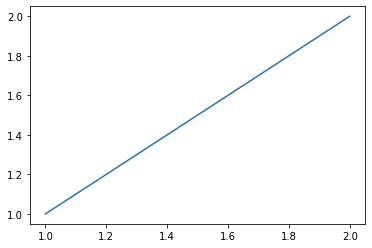

In [4]:
plt.plot([1, 2], [1, 2])

### 混同行列 (Confusion Matrix)

予測と実際の陽性(Positive)、陰性(Negative)をマトリクス状にプロットしたもの
- 真陽性 TP True Positive    正しく陽性であると認識された
- 偽陰性 FN False Negative   本当は陽性だが誤って陰性だと判断されたもの
- 偽陽性 FP False Positive   本当は陰性だが誤って陽性だと判断されたもの
- 真偽性 TN True Negative    正しく陰性であると判断されたもの

<font size="12">

| 実際\予測 |   陽   |  陰 |
|:-----:|:--------:|:------:|
| 陽| 真陽性 TP | 偽陰性 FN |
| 陰| 偽陽性 FP | 真偽性 TN |

</font>  

### 陽性と陰性
- 注目する観点によってどちらになるかが決まる。良いこと、悪いことというニュアンスはない。
- 例えば癌の診断であれば、良性、悪性のどちらを陽性にするかは、データ解析者が恣意的に決めることであって、
先験的に決定することではない。

### 偽陰性と偽陽性
- 基本的にトレードオフの関係にある
    - どちらかを減らそうとすると、もう一方が増大する
    - 多くの場合パラメータを変更することで調整可能
- 一方だけをへらすのは非常に簡単
    - 常に陽性であると判定すれば偽陰性はなくなる
    - 常に陰性であると判定すれば偽陽性はなくなる
- 場合によって、どちらのほうが「より許容できるか」が異なる
- 例: 病気の診断で、病気であることを陽性とする場合
    - 病気が致命的で追加検査が侵食的でない場合: 偽陽性が好ましい\
    $\rightarrow$ 広くスクリーニングして、積極的に追加検査するべき
    - 病気が致命的でなく追加検査が侵食的である場合: 偽陰性が好ましい\
    $\rightarrow$ 誤って追加検査するよりは、病気を見逃したほうがトータルで負荷が少ない





### 精度とその限界

- 精度(Accuracy)

  正しく分類されたサンプル数の割合
  $$ 精度 = \frac{|TP|+|TN|}{|TP|+|TN|+|FP|+|FN|} $$

- 問題点: 偏りのあるデータに対する評価に適さない

  例: 晴天率が90%である地方で、常に晴天であると予測する - 精度 90% だが実は全く意味のないモデルになっている

  | 実際\予測|  陽   |  陰 |
  |:-----:|:--------:|:------:|
  | 陽| TP = 90 | FN = 0|
  | 陰| FP = 10 | TN = 0|




### その他の指標
#### 適合率 (precision)
陽性であると予測されたのサンプルのうち、実際に陽性だった割合

$$ 適合率 = \frac{|TP|}{|TP|+|FP|} $$

#### 再現率 (recall)
実際に陽性のサンプルのうち、正しく陽性と予測された割合。

$$ 再現率 = \frac{|TP|}{|TP|+|FN|} $$

#### いずれも単独では十分ではない



#### f-値  
適合率と再現率をバランス良くまとめるために、調和平均をとったもの。

$$ f値 = 2 \times \frac{適合率 \times 再現率}{適合率 + 再現率} = \frac{2|TP|}{2|TP| + |FP| + |FN|} $$

### 誤差の評価 - MSE と MAE
誤差を単純に加算したのでは、+方向の誤差と-方向の誤差が打ち消し合うのでダメ

- MSE (Mean Squared Error) - 平均二乗誤差
$$ \frac{1}{n} \sum_{i=0}^{n}(\hat{y_i} - y_i)^{2}$$
- MAE (Mean absolute Error) - 平均絶対誤差
$$ \frac{1}{n} \sum_{i=0}^{n}|(\hat{y_i} - y_i)|$$

MSEは大きい誤差に対してより強くペナルティが効く。

In [1]:
from IPython.display import SVG

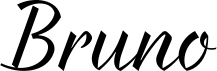

In [3]:
svg = """<!-- Generator: Adobe Illustrator 20.1.0, SVG Export Plug-In  -->
<svg version="1.1"
	 xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:a="http://ns.adobe.com/AdobeSVGViewerExtensions/3.0/"
	 x="0px" y="0px" width="217.6px" height="71.4px" viewBox="0 0 217.6 71.4" style="enable-background:new 0 0 217.6 71.4;"
	 xml:space="preserve">
<defs>
</defs>
<g>
	<path d="M31.1,34.2c15.7-4.4,23.3-15.3,23.4-21.5C51.5,1.6,34.3,0.2,21,10.3l-4.1-5.7C33.6-4,57.8-1,61,17.2
		c-5,8.9-12.4,15-22.5,17.8l0.2,0.6c9.2,0,18.6,7.5,15,17.7C46.6,73.3,19.2,75.4,0,65.6l0.9-2c4.8,2.3,9.7,3.7,14.5,4.3l-3.8-3
		L32.7,5.6l6,3.2L17.4,68.2c13.7,1,25.8-5.1,29.9-16.8c3.1-8.8-4.3-14.3-14.5-12.3L31.1,34.2z"/>
	<path d="M76.6,36.2c0,0-2.4,4.4-5.3,12.1l0.3,0.1c3.2-5.1,10.5-14.9,12.6-16.4c1.4-1,2.9-1.1,4.3,0s2.4,2.4,3.1,3.7
		c2.7,4.8-4,11.1-10,12.7c-0.5-0.4-0.8-1.1-0.8-1.1c4.8-2.9,6.3-8,5.6-13.2c-7.9,5.8-14,15.1-19.3,26.7c-1.1,3.3-2.2,6.7-3.3,10.6
		L58,66.5l12.9-35.2L76.6,36.2z"/>
	<path d="M122,54.2c-1.5,4.1-2.5,9.9-2.5,14.3c8.3-4.2,14.8-10.4,20.5-17.6l1.2,0.6c-5.2,7.5-12,14.6-20.1,19.9
		c-7.1-2-8.1-9.7-4.8-18.8l-0.5-0.3c-3.8,6.6-8.8,12.3-16.2,18.4c-6.7-2.4-8.8-9.6-6.9-16.5c1.9-6.8,8.6-23.7,8.6-23.7l5.4,4.9
		c0,0-5.3,14.8-6.7,18.8c-1.5,4.1-2,9.9-2,14.3c10.9-7.7,17.9-18.4,22.5-30.4c1.5-4.3,2.8-7.6,2.8-7.6l5.3,4.9
		C128.6,35.4,123.4,50.2,122,54.2z"/>
	<path d="M151.4,35.9c0,0-7.9,17.9-10.4,24.3l0.5,0.4c5.7-10.4,14.2-21.6,21.9-28.6c0.9-0.8,3-1,4.2,0c0.7,0.6,3.3,3.1,3.5,3.3
		c1.3,1.3,1.8,3.4,1,5.2c-2.2,4.9-4.8,11.5-6.2,14.6c-1.9,4.5-3.3,9-2.7,13.4c8.4-4.2,14.8-10.4,20.5-17.6l1.2,0.6
		c-5.2,7.6-12,14.7-20.1,19.8c-6.4-2.9-10-9.1-7-16.1c1.9-4.5,5.8-13.3,8-18.9c0.4-0.9,0.3-1.7-0.2-1.7c-3.8,0-24.6,27.3-26.6,36.8
		l-6.1-4.9l12.7-35.2L151.4,35.9z"/>
	<path d="M209.1,36.1c0.1,4.1-0.3,8.3-0.9,11.7c2.1,0.8,5.2,0.9,9.4,0l-0.9,1.7c-3.4,0.8-6.4,0.6-8.8-0.2c-3,12.6-11,20.1-20.4,22
		c-16.2-11.8-5.7-33.5,8.3-40.1l4.1,6.6c-11.5,4-17.8,19.5-13.3,30.7c8.5-2.4,15.9-10,19.2-20c-5.4-3-6.9-9.7-2-15.8l2-1.4
		L209.1,36.1z M207.6,37.9c-3.6,2.5-3.5,6.7-1.3,8.8C207.1,43.9,207.5,41,207.6,37.9z"/>
</g>
</svg>"""


SVG(data=svg)

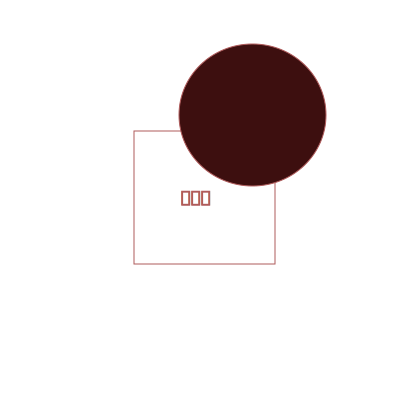

In [4]:
SVG("""<svg width="400px" height="400px" xmlns="http://www.w3.org/2000/svg" version="1.1" xmlns:xlink="http://www.w3.org/1999/xlink">
    <rect x="78" y="83" width="134" height="67" fill="rgb(255, 255, 255)"/>
    <rect x="134" y="131" width="141" height="133" fill="rgb(255, 255, 255)" stroke="rgb(176, 91, 91)"/>
    <ellipse cx="252.5" cy="115" rx="73.5" ry="71" fill="rgb(61, 15, 15)" stroke="rgb(176, 91, 91)"/>
    <text x="180.7" y="202.3" fill="rgb(61, 15, 15)" stroke="rgb(176, 91, 91)">
        てすと
    </text>
</svg>
""")